In [2]:

import matplotlib.pylab as plt

from dataload import load_data ,batchfy 
from torchsummary import summary
import torch
from torch import nn,optim

from functional.functional import noise_vector

from torchvision import transforms, utils

In [3]:


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_default_tensor_type(torch.cuda.FloatTensor)

def eval_generate(Decoder,num_images):
    Decoder.eval()
    noi_input=noise_vector(num_images)
    output=Decoder(noi_input)
    output=output.detach().cpu()
    plt.figure(figsize=(16, 16))
    grid_border_size = 2
    grid = utils.make_grid(output)
    
    plt.imshow((grid.numpy().transpose((1, 2, 0))*0.5)+0.5)
    plt.axis('off')
    plt.ioff()
    plt.show()

def showimg_disentangle(image):
    plt.figure(figsize=(16, 16))
    grid_border_size = 2
    grid = utils.make_grid(image)
    
    plt.imshow((grid.numpy().transpose((1, 2, 0))*0.5)+0.5)
    plt.axis('off')
    plt.ioff()
    plt.show()

In [4]:
train_load,test_load=batchfy(batch_size=64)

In [5]:
Encoder=torch.load('EncoderF.h')
Encoder.to(device)
Encoder.eval()
print("Encoder Loaded")

Encoder Loaded


In [56]:
Decoder=torch.load('DecoderF.h')
Decoder.to(device)
Decoder.eval()
print("Decoder Loaded")

Decoder Loaded


In [57]:
Phi=torch.load('PhiF.h')
Phi.to(device)
Phi.eval()
print("Phi Loaded")

Phi Loaded


In [58]:
Invphi=torch.load('invphiF.h')
Invphi.to(device)
Invphi.eval()
print("Invphi Loaded")

Invphi Loaded


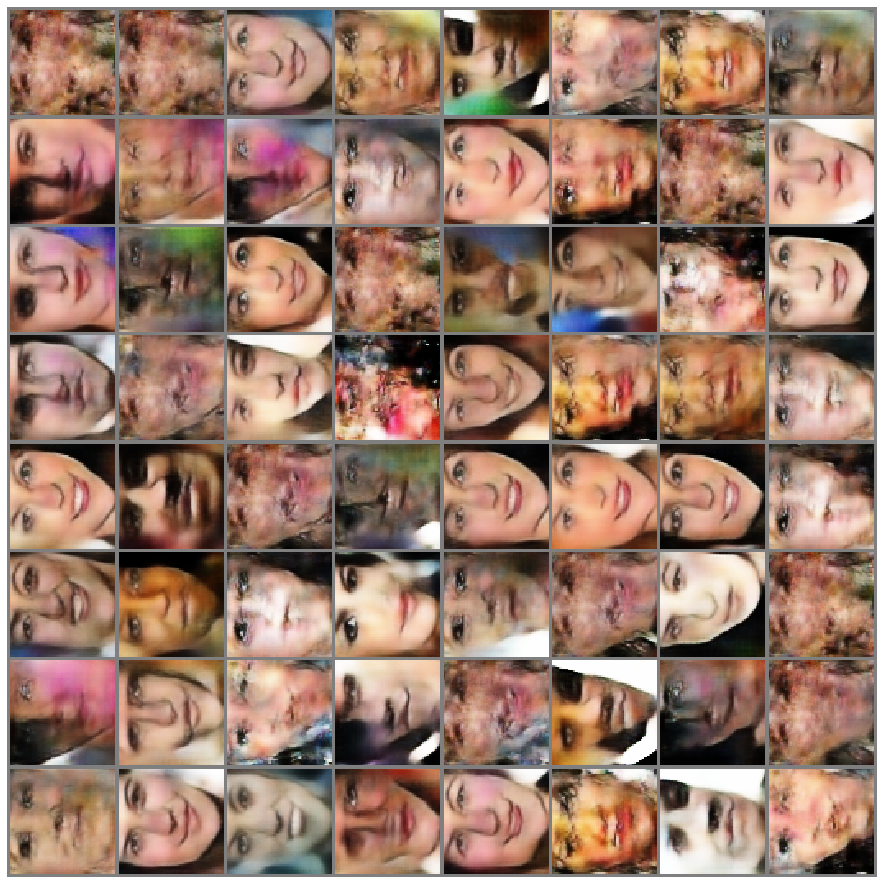

In [7]:
eval_generate(Decoder,64)

In [14]:
for batch_i, (real_images, gender,glasses) in enumerate(test_load):
    debug=real_images
    debug=debug.to(device,dtype=torch.float)
    break
    

In [15]:
reconstruct=Decoder(Encoder(debug)).detach().cpu()
debug=debug.detach().cpu()

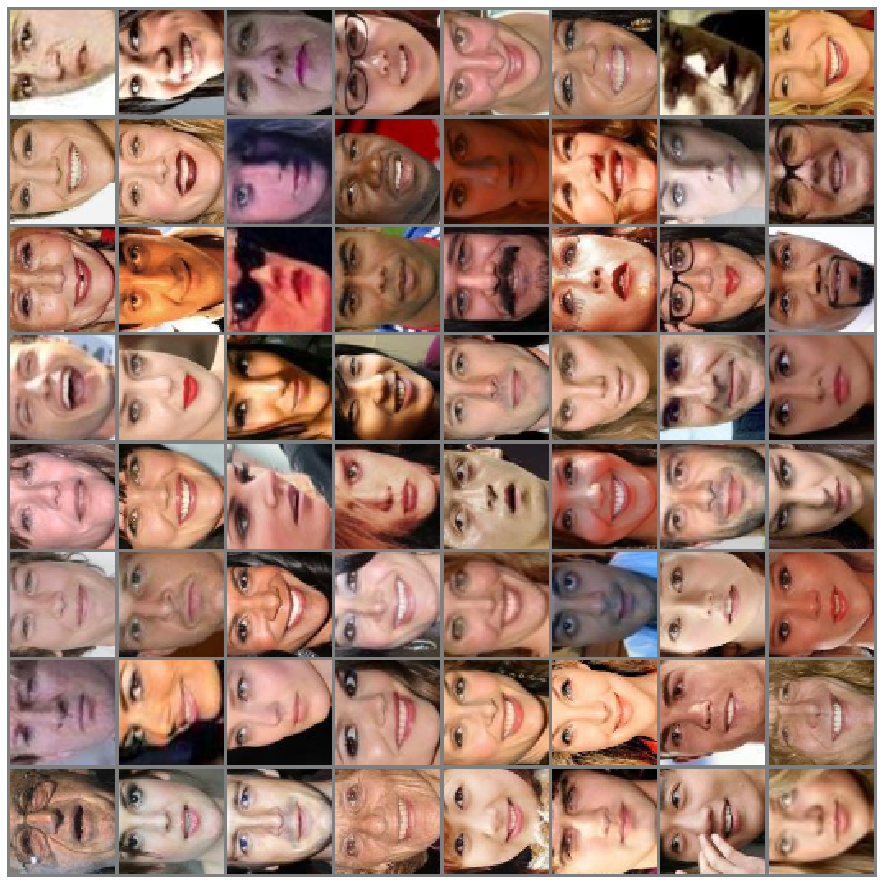

In [16]:
showimg_disentangle(debug)

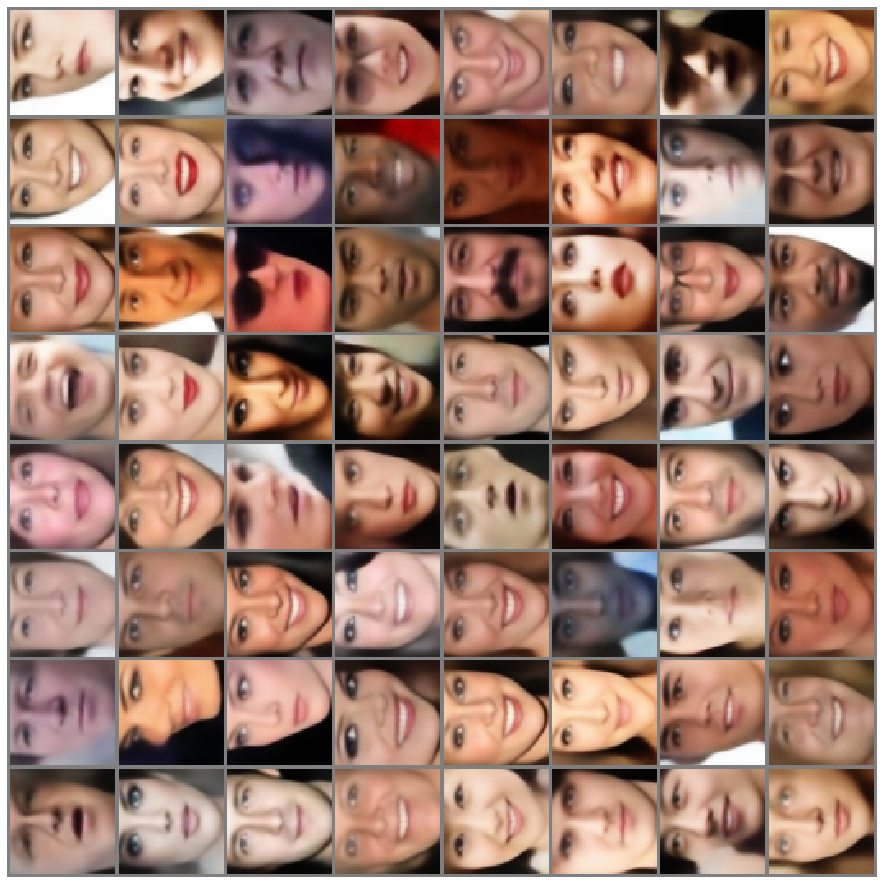

In [17]:
showimg_disentangle(reconstruct)

In [85]:
def picktarget_glass(data_load):
    for batch_i, (real_images, gender,glasses) in enumerate(data_load):
        images=real_images
        result1=glasses
        result2=gender
        
        break
    return images,result1,result2
    



In [99]:
image,glass,gender=picktarget_glass(test_load)

In [100]:
gender>0

tensor([[ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True

In [52]:
result=glass>0

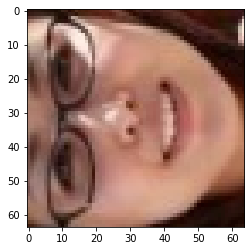

In [48]:
plt.imshow((image[3].numpy().transpose((1, 2, 0))*0.5)+0.5)


In [49]:
target_image=image[3]

In [54]:
domain_image=image[4:8]

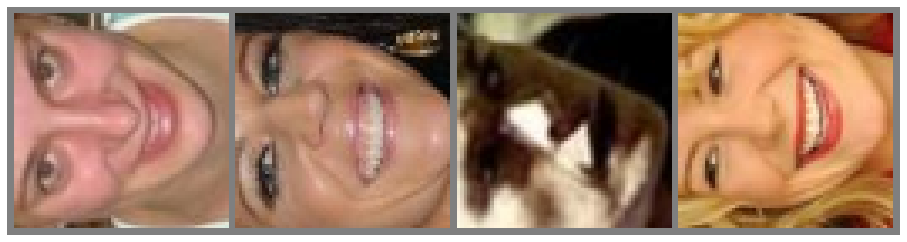

In [55]:
showimg_disentangle(domain_image)

In [68]:
z1_star,z2,z3=Phi(Encoder(target_image.to(device,dtype=torch.float).unsqueeze(0)))

In [69]:
domain_z1,domain_z2,domain_z3=Phi(Encoder(domain_image.to(device,dtype=torch.float)))

In [71]:
z1_star.shape

torch.Size([1, 33])

In [72]:
z_star=torch.cat((z1_star,z1_star,z1_star,z1_star),0)

In [73]:
z_star.shape

torch.Size([4, 33])

In [75]:
vector=torch.cat((z_star,domain_z2,domain_z3),1)

In [77]:
vector.shape

torch.Size([4, 99])

In [82]:
final_img=Decoder(Invphi(vector)).detach()

In [83]:
final_img.shape

torch.Size([4, 3, 64, 64])

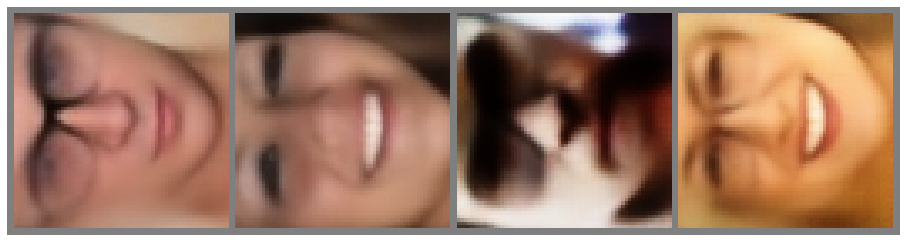

In [84]:
showimg_disentangle(final_img.cpu())

In [101]:
target_image=image[11]
domain_image=image[12:16]

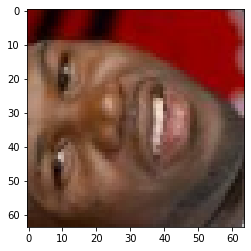

In [102]:
plt.imshow((target_image.numpy().transpose((1, 2, 0))*0.5)+0.5)


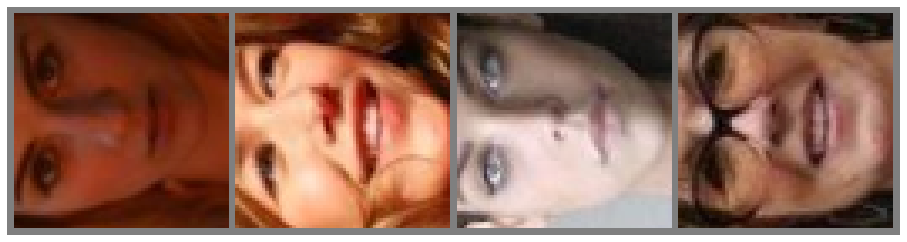

In [103]:
showimg_disentangle(domain_image)

In [104]:
z1,z2_star,z3=Phi(Encoder(target_image.to(device,dtype=torch.float).unsqueeze(0)))

In [105]:
domain_z1,domain_z2,domain_z3=Phi(Encoder(domain_image.to(device,dtype=torch.float)))

In [106]:
z_star=torch.cat((z2_star,z2_star,z2_star,z2_star),0)

In [107]:
vector=torch.cat((domain_z1,z_star,domain_z3),1)

In [108]:
final_img=Decoder(Invphi(vector)).detach()

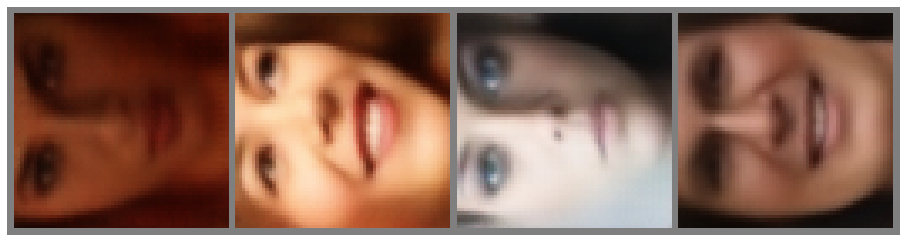

In [109]:
showimg_disentangle(final_img.cpu())

In [110]:
z1_stack=torch.cat((z1,z1,z1,z1),0)
z3_stack=torch.cat((z3,z3,z3,z3),0)
vector=torch.cat((z1_stack,domain_z2,z3_stack),1)

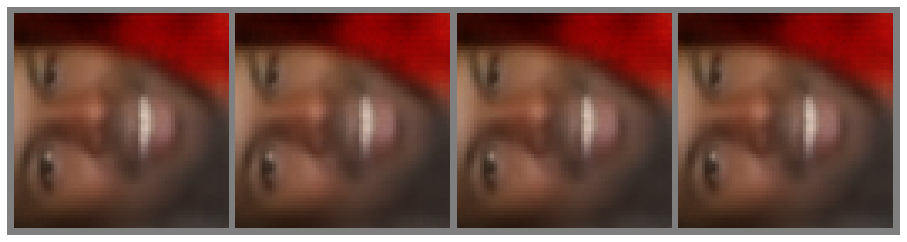

In [111]:
final_img=Decoder(Invphi(vector)).detach()
showimg_disentangle(final_img.cpu())